# Pyber Challenge

### Initilization

In [22]:
# Add Matplotlib inline "magic" command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [23]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(20)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,$9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,$43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,$35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,$35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,$42.81,5327642267789,33,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type
## **Data is presumably pre-cleaned*

In [24]:

#  1. Get the total rides for each city type
city_type_df = pyber_data_df.groupby(['type'])
city_type_df
total_rides = city_type_df.count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [25]:
# 2. Get the total drivers for each city type
total_drivers = pyber_data_df.drop_duplicates(subset='city')
total_drivers = total_drivers.groupby(['type']).sum()['driver_count']
total_drivers

/var/folders/fg/_95_hyl97vs_68pl3g3nf6mw0000gn/T/ipykernel_27028/3003590953.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_drivers = total_drivers.groupby(['type']).sum()['driver_count']


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [26]:
#  3. Get the total amount of fares for each city type
total_fares = city_type_df.sum()['fare']
total_fares

/var/folders/fg/_95_hyl97vs_68pl3g3nf6mw0000gn/T/ipykernel_27028/415073943.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_fares = city_type_df.sum()['fare']


type
Rural       $4,327.93
Suburban   $19,356.33
Urban      $39,854.38
Name: fare, dtype: float64

In [27]:
#  4. Get the average fare per ride for each city type. 
avg_fares_per_ride = city_type_df.mean()['fare']
avg_fares_per_ride

/var/folders/fg/_95_hyl97vs_68pl3g3nf6mw0000gn/T/ipykernel_27028/1907266806.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_fares_per_ride = city_type_df.mean()['fare']


type
Rural      $34.62
Suburban   $30.97
Urban      $24.53
Name: fare, dtype: float64

In [28]:
# 5. Get the average fare per driver for each city type. 

avg_fares_per_driver = [(city_type_df.sum()['fare'][x] / total_drivers[x]) for x in range(len(total_drivers))]

print(city_type_df.sum()['fare'][0])
print(total_drivers[0])
print(range(len(total_drivers)))

avg_fares_per_driver

4327.93
78
range(0, 3)


/var/folders/fg/_95_hyl97vs_68pl3g3nf6mw0000gn/T/ipykernel_27028/2941294549.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_fares_per_driver = [(city_type_df.sum()['fare'][x] / total_drivers[x]) for x in range(len(total_drivers))]
/var/folders/fg/_95_hyl97vs_68pl3g3nf6mw0000gn/T/ipykernel_27028/2941294549.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(city_type_df.sum()['fare'][0])


[55.48628205128205, 39.50271428571429, 16.571467775467774]

In [29]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({ 'Total Rides': total_rides,
                                  'Total Drivers': total_drivers,
                                  'Total Fares': total_fares,
                                  'Average Fares Per Ride': avg_fares_per_ride,
                                  'Average Fares Per Driver': avg_fares_per_driver })
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares Per Ride,Average Fares Per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [30]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares Per Ride,Average Fares Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [31]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares Per Ride,Average Fares Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [32]:
# Print the merged DataFrame for reference.
pyber_data_df.head(20)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,$9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,$43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,$35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,$35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,$42.81,5327642267789,33,Urban


In [33]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_df = pyber_data_df.groupby(['type','date']).sum()['fare']
type_date_df

/var/folders/fg/_95_hyl97vs_68pl3g3nf6mw0000gn/T/ipykernel_27028/250412130.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  type_date_df = pyber_data_df.groupby(['type','date']).sum()['fare']


type   date               
Rural  2019-01-01 09:45:36   $43.69
       2019-01-02 11:18:32   $52.12
       2019-01-03 19:51:01   $19.90
       2019-01-04 03:31:26   $24.88
       2019-01-06 07:38:40   $47.33
                              ...  
Urban  2019-05-08 04:20:00   $21.99
       2019-05-08 04:39:49   $18.45
       2019-05-08 07:29:01   $18.55
       2019-05-08 11:38:35   $19.77
       2019-05-08 13:10:18   $18.04
Name: fare, Length: 2375, dtype: float64

In [34]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pre_pivot_df = type_date_df.reset_index()
pre_pivot_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,$21.99
2371,Urban,2019-05-08 04:39:49,$18.45
2372,Urban,2019-05-08 07:29:01,$18.55
2373,Urban,2019-05-08 11:38:35,$19.77


In [35]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_df = pre_pivot_df.pivot(index='date',
                   columns='type',
                   values='fare')
pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,$21.99
2019-05-08 04:39:49,NaN,NaN,$18.45
2019-05-08 07:29:01,NaN,NaN,$18.55


In [36]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
jan_apr_df = pivot_df.loc['2019-01-01':'2019-04-28']
jan_apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-27 17:58:27,$14.01,NaN,NaN
2019-04-27 19:45:48,NaN,$28.84,NaN
2019-04-27 20:41:36,NaN,NaN,$8.28


In [37]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_apr_df.index = pd.to_datetime(jan_apr_df.index)
jan_apr_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-27 14:11:38', '2019-04-27 14:37:32',
               '2019-04-27 14:57:38', '2019-04-27 16:20:00',
               '2019-04-27 16:22:23', '2019-04-27 17:58:27',
               '2019-04-27 19:45:48', '2019-04-27 20:41:36',
               '2019-04-27 23:26:03', '2019-04-27 23:52:44'],
              dtype='datetime64[ns]', name='date', length=2177, freq=None)

In [38]:
# 6. Check that the datatype for the index is datetime using df.info()
jan_apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [39]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_rides_df = jan_apr_df.resample('W').sum()
weekly_rides_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


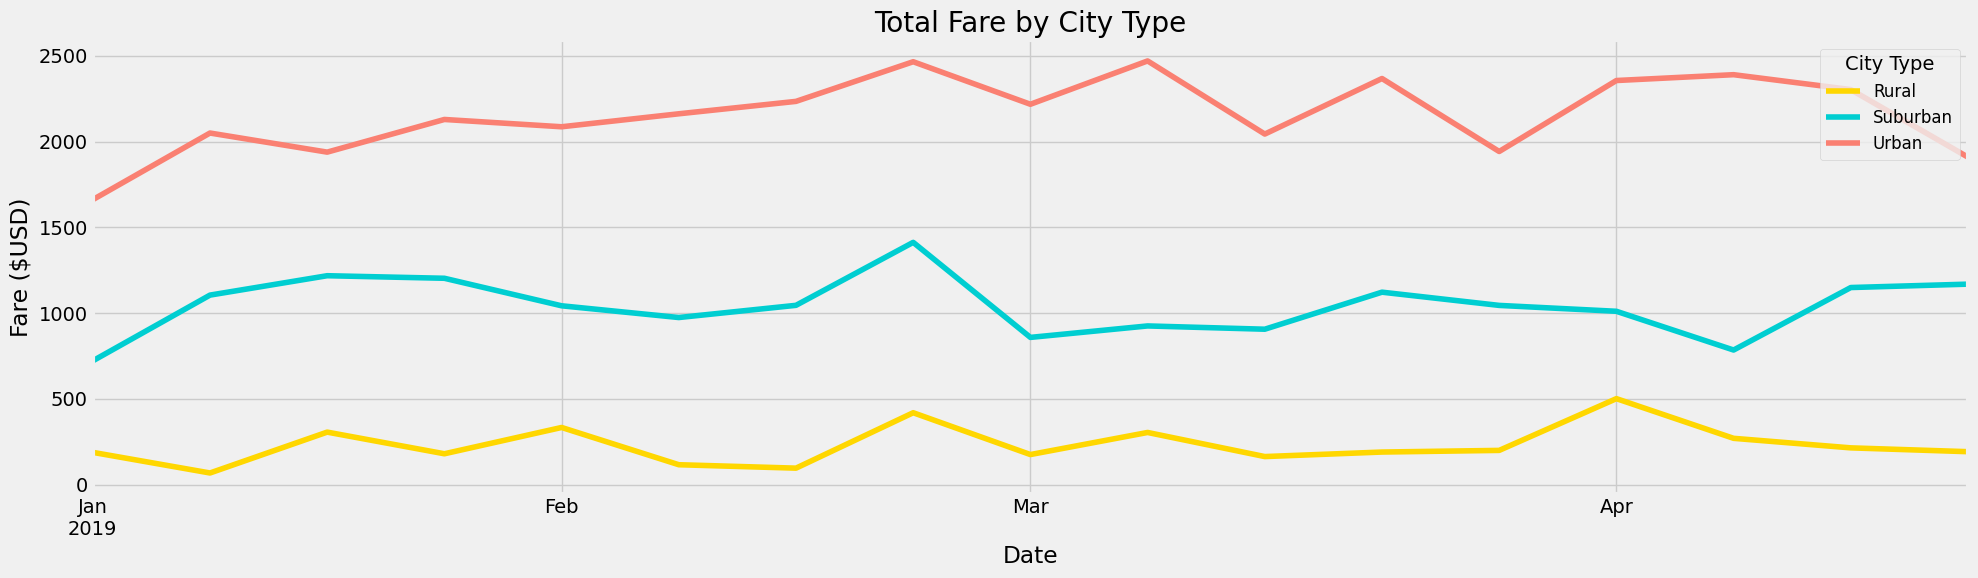

In [40]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

fig, ax = plt.subplots(figsize=(20,6))

weekly_rides_df.plot(ax = ax,
                     kind = 'line',
                     color = ['gold','darkturquoise','salmon']
                    )
ax.set_title('Total Fare by City Type')
ax.set_xlabel('Date')
ax.set_ylabel('Fare ($USD)')

lgnd = ax.legend(fontsize="12",loc="upper right", title="City Type")
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig.tight_layout()

fig.savefig('analysis/Fare_by_Type_Line.png')